# 깊은 다층 퍼셉트론으로 MNIST를 인식

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# keras는 튜플 형태로 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##### 순서
- 층이 5개인 딥 러닝 모델
1. 데이터 텐서모양 변경 : 3차원 >> 2차원
2. 표준화(0 ~ 1) - 학습
3. 정답은 one hot encoding
4. 딥러닝 모델 구조를 Sequential
5. hidden layer : Dense를 3
6. compile
7. 학습 : hist변수로 받아서 차후에 시각화
8. 정확률 측정
9. hist를 이용해서 시각화를 통해 최적의 epoch를 유추

In [3]:
x_train.shape  # 28 * 28

(60000, 28, 28)

In [4]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [5]:
# 최초
n_input = 28*28
n_hidden1 = 28*28*2
n_hidden2 = n_hidden1 / 2
n_hidden3 = n_hidden2 / 2
n_output = 10

In [6]:
# 신경망 구조 설계
model = Sequential()

#입력층과 연결되는 Dense
dense1 = Dense(units = n_hidden1, input_shape = (n_input,), kernel_initializer = 'random_uniform',
                                      activation = 'tanh')
dense2 = Dense(units = n_hidden2, activation = 'tanh')
dense3 = Dense(units = n_hidden3, activation = 'tanh')

#출력층과 연결되는 Dense
dense4 = Dense(units = n_output, activation = 'tanh')
model.add(dense1)
model.add(dense2)
model.add(dense3)
model.add(dense4)

In [7]:
# 신경망 학습
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])

In [8]:
hist = model.fit(x_train,y_train, batch_size = 128, epochs = 30, validation_data=(x_test,y_test))

Epoch 1/30
469/469 [==============================] - 13s 29ms/step - loss: 0.4295 - accuracy: 0.1135 - val_loss: 0.3679 - val_accuracy: 0.1135
Epoch 2/30
469/469 [==============================] - 13s 28ms/step - loss: 0.3657 - accuracy: 0.1124 - val_loss: 0.3647 - val_accuracy: 0.1135
Epoch 3/30
469/469 [==============================] - 13s 27ms/step - loss: 0.3637 - accuracy: 0.1124 - val_loss: 0.3638 - val_accuracy: 0.1135
Epoch 4/30
469/469 [==============================] - 14s 29ms/step - loss: 0.3628 - accuracy: 0.1124 - val_loss: 0.3630 - val_accuracy: 0.1135
Epoch 5/30
469/469 [==============================] - 13s 28ms/step - loss: 0.3621 - accuracy: 0.1124 - val_loss: 0.3629 - val_accuracy: 0.1135
Epoch 6/30
469/469 [==============================] - 13s 27ms/step - loss: 0.3616 - accuracy: 0.1124 - val_loss: 0.3625 - val_accuracy: 0.1135
Epoch 7/30
469/469 [==============================] - 13s 27ms/step - loss: 0.2379 - accuracy: 0.1124 - val_loss: 0.1839 - val_accuracy:

# Day08

In [9]:
res = model.evaluate(x_test,y_test)
res

313/313 [==============================] - 2s 6ms/step - loss: 0.0923 - accuracy: 0.1135


[0.0923229232430458, 0.11349999904632568]

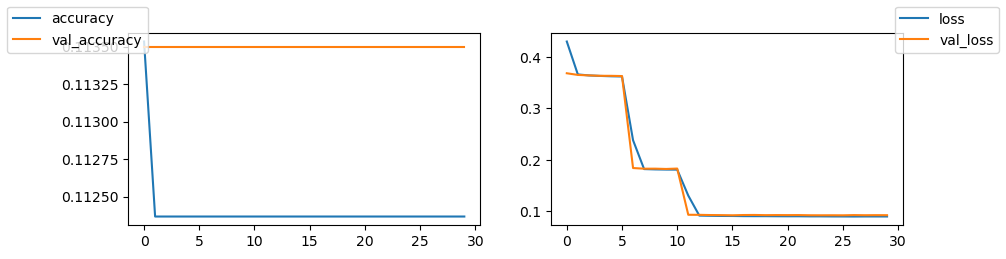

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(1,2,figsize = (10,2.5))
sns.lineplot(data=hist.history['accuracy'], ax= ax[0])
sns.lineplot(data=hist.history['val_accuracy'], ax= ax[0])
fig.legend(['accuracy','val_accuracy'], loc = 'upper left')

sns.lineplot(data=hist.history['loss'], ax= ax[1])
sns.lineplot(data=hist.history['val_loss'], ax= ax[1])
fig.legend(['loss','val_loss'])

plt.show()

In [11]:
# 가중치 초기화
# kernel_initializer의 기본값은 glorot_uniform
# Glorot2010에서 유래 >> 성능이 좋다고 판단해서 기본 값으로 채택하였음
# 균일분포보다 우수한 성능을 제공함

In [12]:
# 앞으로는 glorot_uniform을 사용
# dense1 = Dense(units = n_hidden1, input_shape = (n_input,), activation = 'tanh')
# dense2 = Dense(units = n_hidden2, activation = 'tanh')
# dense3 = Dense(units = n_hidden3, activation = 'tanh')

# 출력층과 연결되는 Dense
# dense4 = Dense(units = n_output, activation = 'tanh')

-  Dense 층이 많아지면 문제 발생함
1. 그레이디언트 소멸문제
2. 과잉적합

In [13]:
# 미분의 연쇄법칙 chain rule에 의해서 i번째 층의 그레이던트는 오른쪽의 i+1번째 층의 그레이던트에 자신층에서 
# 그레이디언트를 곱해서 구함
# 그레이디언트가 0.001처럼 작은 경우 왼쪽으로 진행하면서 점점 작아짐
# 왼쪽으로 갈수록 가중치 갱신이 느려져서 전체 신경망의 학습이 매우 느린현상

##### Colab에서는 하드웨어 가속기를 TPU로 설정

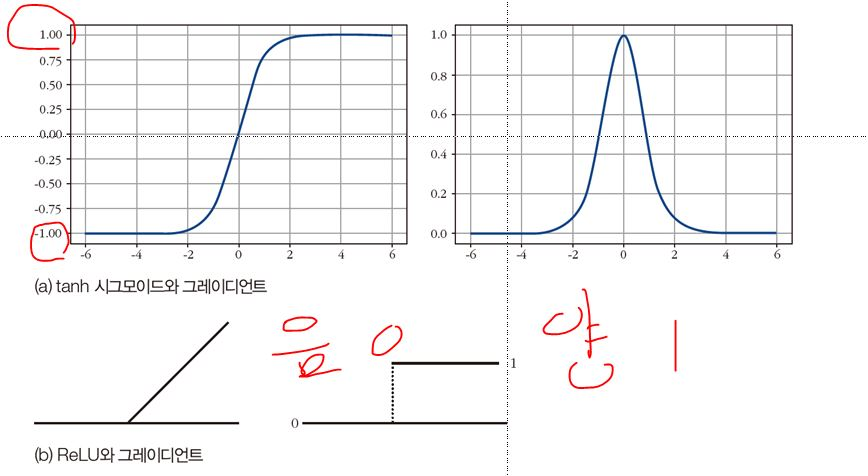

In [14]:
# 그레이디언트 소멸문제
# Relu 함수를 이용해서 해결
# Tanh(s) 시그모이드 함수의 문제점
# s가 클때 그레이던트가 0에 가까워짐
# ReLU는 s가 음수일때 그레이던트는 0 양수일때는 1
from IPython import display
display.Image('./img/021.jpg', width = 500, height = 500)

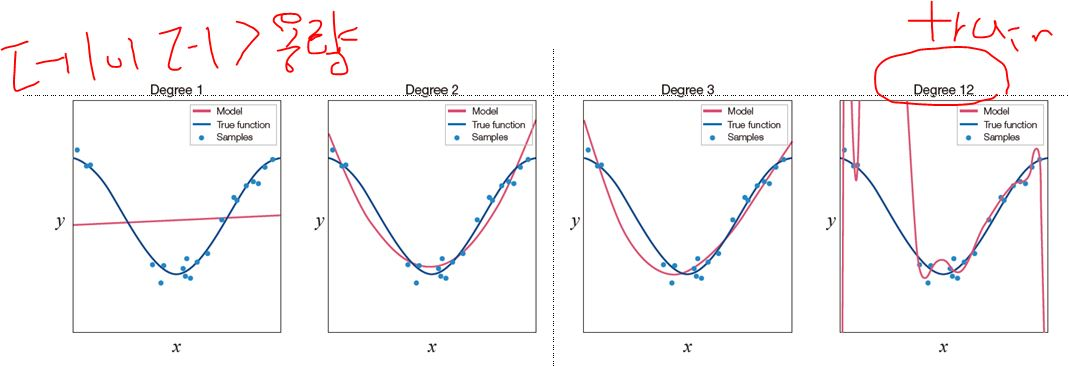

In [15]:
display.Image('./img/022.jpg', width = 500, height = 500)

- 딥러닝의 회피전략
- 데이터의 양을 늘리고 데이터의 양을 늘릴 수 없는 상황 -> 훈련샘플을 변형해서 인위적으로 늘리는 데이터 증대
- data augmentation

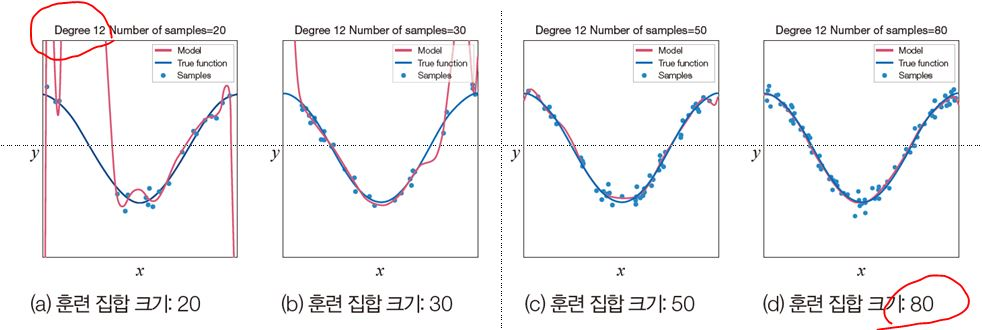

In [16]:
display.Image('./img/023.jpg', width = 500, height = 500)

#### 규제기법 : 데이터 증대, 가중치 감쇠, 드랍아웃, 앙상블

#### 손실함수
- 평균제곱오차 MSE의 문제점
1. 교정에 사용하는 값 - 그레이디언트가 벌점에 해당, 오차 e가 더큰데 그레이디언트가 더 작은 상황이 발생
2. (비유, 공부를 못하는 학생이 더 높은 점수를 받는 상황)
3. 학습이 느려지거나 학습이 안되는 상황 발생

#### 엔트로피 entropy
1. 확률 분포의 무작위성을 측정하는 함수

#### 텐서 플로는 30여종의 손실 함수를 제공함
http://keras.id./losses

In [17]:
# 손실함수를 지정하는 코딩 방식
# model.compile(loss='categorical_crossentropy' ...)
# import tensorflow as tf
# model.compile(loss=tf.keras.losses,categorical_crossentropy ,...)
# import.tensorflow.keras.losses as ls
# model.compile(loss=ls.cacateorical_crossentropy)

In [18]:
# 손실함수의 성능 비교 실험
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [19]:
# mnist를 읽어와서 신경망에 입력할 수 있는 형태로 변환
# 학습용 데이터
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0


# 검증용 데이터
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [20]:
x_train.shape

(60000, 784)

In [21]:
# L = 5
n_input = 784  # x_train 출력 값
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10   # y_train 출력 값   

In [22]:
# 평균제곱오차를 사용한 모델
model_mse = Sequential()
d1 = Dense(units=n_hidden1,input_shape=(n_input,), activation = 'tanh')
d2 = Dense(units=n_hidden2, activation = 'tanh')
d3 = Dense(units=n_hidden3, activation = 'tanh')
d4 = Dense(units=n_hidden4, activation = 'tanh')       # 사이 층들의 활성화함수는 사용자 임의(학습마다 결과 다르기에)
d5 = Dense(units=n_output, activation = 'softmax')    # 마지막 분류시 이진분류 : 시그모이드,   다중분류 : softmax
model_mse.add(d1)
model_mse.add(d2)
model_mse.add(d3)
model_mse.add(d4)
model_mse.add(d5)
model_mse.compile(loss=tf.keras.losses.mean_squared_error, optimizer = Adam(learning_rate=0.0001), metrics=['accuracy'])

hist_mse = model_mse.fit(x_train, y_train, batch_size = 128, epochs = 30, validation_data = (x_test,y_test), verbose=2)

Epoch 1/30
469/469 - 9s - loss: 0.0162 - accuracy: 0.8931 - val_loss: 0.0106 - val_accuracy: 0.9314
Epoch 2/30
469/469 - 9s - loss: 0.0097 - accuracy: 0.9371 - val_loss: 0.0081 - val_accuracy: 0.9486
Epoch 3/30
469/469 - 9s - loss: 0.0075 - accuracy: 0.9519 - val_loss: 0.0069 - val_accuracy: 0.9557
Epoch 4/30
469/469 - 9s - loss: 0.0059 - accuracy: 0.9629 - val_loss: 0.0057 - val_accuracy: 0.9629
Epoch 5/30
469/469 - 9s - loss: 0.0050 - accuracy: 0.9693 - val_loss: 0.0051 - val_accuracy: 0.9663
Epoch 6/30
469/469 - 8s - loss: 0.0042 - accuracy: 0.9742 - val_loss: 0.0049 - val_accuracy: 0.9680
Epoch 7/30
469/469 - 8s - loss: 0.0036 - accuracy: 0.9782 - val_loss: 0.0044 - val_accuracy: 0.9710
Epoch 8/30
469/469 - 9s - loss: 0.0031 - accuracy: 0.9815 - val_loss: 0.0040 - val_accuracy: 0.9743
Epoch 9/30
469/469 - 9s - loss: 0.0027 - accuracy: 0.9845 - val_loss: 0.0040 - val_accuracy: 0.9726
Epoch 10/30
469/469 - 8s - loss: 0.0024 - accuracy: 0.9858 - val_loss: 0.0038 - val_accuracy: 0.9748

In [23]:
# 교차엔트로피를 사용한 모델
model_ce = Sequential()
d1 = Dense(units=n_hidden1,input_shape=(n_input,), activation = 'tanh')
d2 = Dense(units=n_hidden2, activation = 'tanh')
d3 = Dense(units=n_hidden3, activation = 'tanh')
d4 = Dense(units=n_hidden4, activation = 'tanh')
d5 = Dense(units=n_output, activation = 'softmax')
model_ce.add(d1)
model_ce.add(d2)
model_ce.add(d3)
model_ce.add(d4)
model_ce.add(d5)
model_ce.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate=0.0001), metrics=['accuracy'])

hist_ce = model_ce.fit(x_train, y_train, batch_size = 128, epochs = 30, validation_data = (x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 8s - loss: 0.3694 - accuracy: 0.8949 - val_loss: 0.2306 - val_accuracy: 0.9317
Epoch 2/30
469/469 - 8s - loss: 0.2001 - accuracy: 0.9423 - val_loss: 0.1591 - val_accuracy: 0.9528
Epoch 3/30
469/469 - 9s - loss: 0.1448 - accuracy: 0.9571 - val_loss: 0.1331 - val_accuracy: 0.9603
Epoch 4/30
469/469 - 8s - loss: 0.1108 - accuracy: 0.9670 - val_loss: 0.1079 - val_accuracy: 0.9671
Epoch 5/30
469/469 - 8s - loss: 0.0890 - accuracy: 0.9732 - val_loss: 0.0991 - val_accuracy: 0.9697
Epoch 6/30
469/469 - 7s - loss: 0.0727 - accuracy: 0.9785 - val_loss: 0.0869 - val_accuracy: 0.9722
Epoch 7/30
469/469 - 7s - loss: 0.0600 - accuracy: 0.9819 - val_loss: 0.0812 - val_accuracy: 0.9746
Epoch 8/30
469/469 - 8s - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0758 - val_accuracy: 0.9765
Epoch 9/30
469/469 - 8s - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0709 - val_accuracy: 0.9764
Epoch 10/30
469/469 - 7s - loss: 0.0338 - accuracy: 0.9901 - val_loss: 0.0649 - val_accuracy: 0.9798

In [24]:
# 두 모델의 정확률 비교
res_mse = model_mse.evaluate(x_test,y_test)
res_ce = model_ce.evaluate(x_test,y_test)
res_mse, res_ce

313/313 [==============================] - 2s 5ms/step - loss: 0.1226 - accuracy: 0.9712


([0.003184007713571191, 0.9793999791145325],
 [0.12258530408143997, 0.9711999893188477])

##### 옵티마이저 : 손실함수의 최저점을 찾아줌
- 표준이 SGD 옵티마이저
1. 모멘텀 : 이전 운동량을 현재에 반영 
2. 적응적학습률

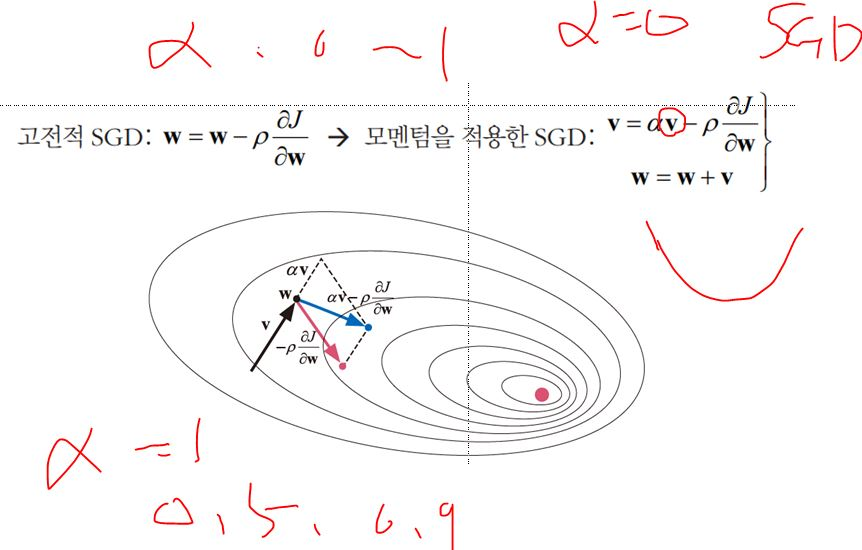

In [25]:
display.Image('./img/024.jpg', width = 500, height = 500)

- 네스테로프 모멘텀
1. 현재 점 w에서 미분하는 대신, 이전 정보인 alpha부위를 이용해서 다음으로 이동할 w^을 예측하고 그곳에서 그레이던트를 계산
https://distill.pub/2017/momentum/

- 텐서플로 모멘텀 적용
- 기본값은 모멘텀 적용하지 않음, 네스테로프도 적용하지 않음

In [26]:
# learning rate = 0.0001이고 모멘텀이 0.9, 네스테로프를 적용
tf.keras.optimizers.SGD(learning_rate=0.0001, momentum = 0.9 , nesterov=True)

In [27]:
# 그레이던트는 최저점의 방향은 알려주지만, 이동량에 대한 정보가 없다
# >> 학습률을 조금씩 계산하여 보수적으로 0

# 적응적 학습률
# 상황에 맞게 학습률을 조정
# Adagrad : 이전 그레이던트를 누적한 정보를 이용하여 학습률을 적응적으로 설정
# RMSProp : 이전 그레이던트를 누적할 때 오래된 것의 영향을 줄이는 정책 Adagrad개선
## Adam : RMSprop에 모멘텀을 적용해서 RMSprop을 개선